In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'Test.csv'
data = pd.read_csv(file_path)

print(data.head())


       Country Age Group  Gender Urban/Rural  Daily SM Usage (hrs)  \
0      Myanmar     18-25    Male       Rural                  2.89   
1    Indonesia     18-25  Female       Urban                  3.24   
2      Vietnam     36-45    Male       Rural                  7.84   
3  Philippines     26-35    Male       Urban                  1.25   
4         Laos     56-65    Male       Rural                  3.94   

  Most Used SM Platform Frequency of SM Use  Likes Received (per post)  \
0                WeChat              Weekly                        652   
1             Instagram              Rarely                        295   
2             Instagram               Daily                        412   
3                WeChat              Rarely                        387   
4              Facebook               Daily                        148   

   Comments Received (per post)  Shares Received (per post)  \
0                            80                         226   
1       

In [ ]:
# 4. Missing Values
# Checking for missing values
print("\nMissing Values in each column:")
print(data.isnull().sum())


In [ ]:
# Handling missing values by imputing median for numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    data[col] = data[col].fillna(data[col].median())

# Handling missing values by imputing mode for categorical columns
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

print("\nMissing Values After Handling:")
print(data.isnull().sum())

In [ ]:
# 2. Detect and Handle Outliers
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Check for outliers in numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    outliers = detect_outliers_iqr(data[col])
    print(f"{col} has {len(outliers)} outliers")

# Handle outliers by capping them within bounds
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.clip(data[col], lower_bound, upper_bound)

In [ ]:
# 5. Outliers Detection and Handling
# We can use z-scores to detect outliers in numerical columns
numerical_columns = ['Daily SM Usage (hrs)', 'Likes Received (per post)', 'Comments Received (per post)', 
                     'Shares Received (per post)', 'Peer Comparison Frequency (1-10)', 
                     'Social Anxiety Level (1-10)', 'Body Image Impact (1-10)', 
                     'Sleep Quality Impact (1-10)', 'Self Confidence Impact (1-10)', 
                     'Cyberbullying Experience (1-10)', 'Anxiety Levels (1-10)']

z_scores = np.abs(stats.zscore(data[numerical_columns]))  # Now it will work as stats is imported
outliers = (z_scores > 3).all(axis=1)  # True for rows with outliers

print(f"\nOutliers detected: {outliers.sum()} rows")

# Optionally, you can remove outliers or cap them
# Removing rows with outliers
data_no_outliers = data[~outliers]

In [ ]:
# 3. Data Transformation (Optional: Log Transformation for skewed data)
# Apply log transformation for highly skewed columns like "Likes Received"
skewed_columns = ['Likes Received (per post)', 'Comments Received (per post)', 'Shares Received (per post)']
for col in skewed_columns:
    data[col] = np.log1p(data[col])  # Use log(1+x) to handle 0 values

# Printing the dataset after transformation
print("\nDataset after Log Transformation:")
print(data.head())

In [ ]:
# Standardization using formula (x - mean) / std
def standardize(column):
    return (column - column.mean()) / column.std()

# Standardize specific columns (Likes, Comments, Shares)
columns_to_standardize = ['Likes Received (per post)', 'Comments Received (per post)', 'Shares Received (per post)']
scaled_data = data.copy()  # Create a copy of the dataset for scaled data
for col in columns_to_standardize:
    scaled_data[col] = standardize(scaled_data[col])

# Optional: Standardize all rating attributes (1-10 scale)
rating_columns = ['Peer Comparison Frequency (1-10)', 'Social Anxiety Level (1-10)',
                  'Body Image Impact (1-10)', 'Sleep Quality Impact (1-10)', 
                  'Self Confidence Impact (1-10)', 'Cyberbullying Experience (1-10)', 
                  'Anxiety Levels (1-10)']

for col in rating_columns:
    scaled_data[col] = standardize(scaled_data[col])

# Display first 5 rows of scaled data
print("\nScaled Data (First 5 Rows):")
print(scaled_data.head())

In [ ]:
def usage_intensity(hours):
    if hours < 2:
        return 'Low'
    elif hours < 5:
        return 'Medium'
    else:
        return 'High'

scaled_data['Usage Intensity'] = scaled_data['Daily SM Usage (hrs)'].apply(usage_intensity)


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset creation (replace this with your actual dataset loading code)
data = {
    'Daily SM Usage (hrs)': [2.89, 3.24, 7.84, 1.25, 3.94],
    'Social Anxiety Level (1-10)': [1, 2, 10, 7, 10]
}
df = pd.DataFrame(data)

# Scaling data
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Histogram plot
sns.histplot(data=scaled_data, x='Daily SM Usage (hrs)', kde=True, color='blue')
plt.title('Distribution of Daily Social Media Usage (hrs)')
plt.xlabel('Daily SM Usage (hrs)')
plt.ylabel('Frequency')
plt.show()

# Print scaled_data
print("Scaled Data:")
print(scaled_data)


In [4]:
# Splitting the dataset into training and remaining (80% train, 20% test/validation)
train_data, temp_data = train_test_split(data, test_size=0.2, random_state=42)

# Splitting the remaining data into validation and test sets (50% each of the 20%)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Displaying the sizes of the datasets
print("Training Dataset Size:", train_data.shape)
print("Validation Dataset Size:", validation_data.shape)
print("Testing Dataset Size:", test_data.shape)

Training Dataset Size: (272732, 20)
Validation Dataset Size: (34092, 20)
Testing Dataset Size: (34092, 20)


In [5]:
# Training Dataset Analysis
print("\nTraining Dataset Overview:")
print(train_data.describe())  # Statistical summary of training data
print("\nTraining Dataset Columns:")
print(train_data.info())  


Training Dataset Overview:
       Daily SM Usage (hrs)  Likes Received (per post)  \
count         272732.000000              272732.000000   
mean               6.245675                 504.408203   
std                3.316556                 285.860994   
min                0.500000                  10.000000   
25%                3.370000                 257.000000   
50%                6.240000                 504.000000   
75%                9.110000                 752.000000   
max               12.000000                 999.000000   

       Comments Received (per post)  Shares Received (per post)  \
count                 272732.000000               272732.000000   
mean                     249.422272                  149.420321   
std                      144.375859                   86.653250   
min                        0.000000                    0.000000   
25%                      124.000000                   74.000000   
50%                      249.000000            

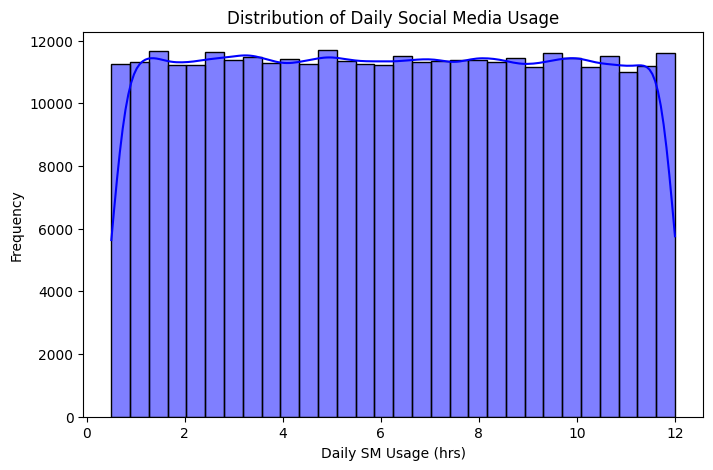

In [7]:
# Histogram of Daily Social Media Usage
plt.figure(figsize=(8, 5))
sns.histplot(data['Daily SM Usage (hrs)'], kde=True, color='blue', bins=30)
plt.title('Distribution of Daily Social Media Usage')
plt.xlabel('Daily SM Usage (hrs)')
plt.ylabel('Frequency')
plt.show()

C:\Users\lxy03\AppData\Local\Temp\ipykernel_26004\3826892212.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age Group', y='Social Anxiety Level (1-10)', data=data, palette='Set2')


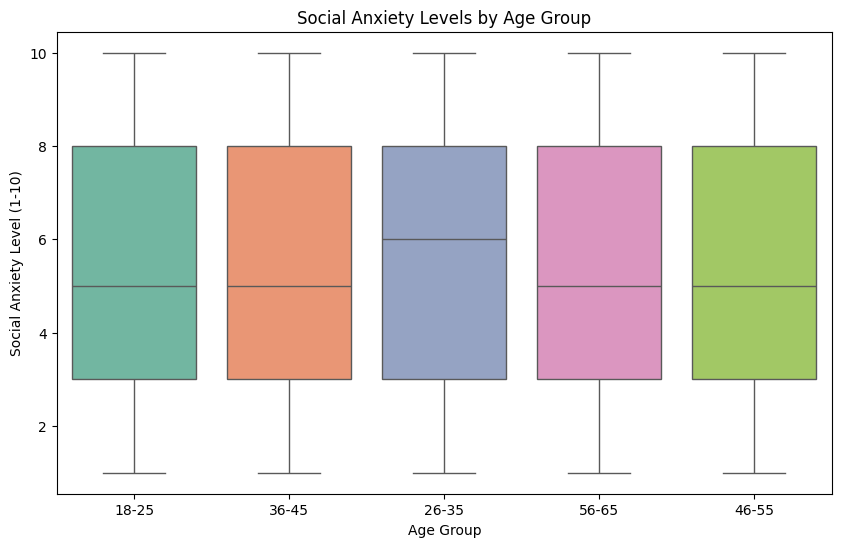

In [8]:
# Box Plot of Social Anxiety Levels by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Social Anxiety Level (1-10)', data=data, palette='Set2')
plt.title('Social Anxiety Levels by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Social Anxiety Level (1-10)')
plt.show()

C:\Users\lxy03\AppData\Local\Temp\ipykernel_26004\1886686924.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='viridis')


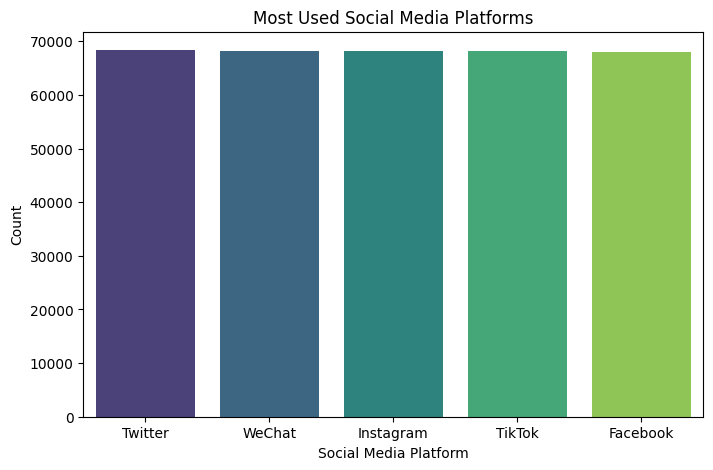

In [9]:
# Bar Chart of Most Used SM Platforms
plt.figure(figsize=(8, 5))
platform_counts = data['Most Used SM Platform'].value_counts()
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='viridis')
plt.title('Most Used Social Media Platforms')
plt.xlabel('Social Media Platform')
plt.ylabel('Count')
plt.show()

In [ ]:
# Get numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns needed for the subplots
n_cols = 3  # Define the number of columns per row
n_rows = (len(numerical_columns) // n_cols) + (len(numerical_columns) % n_cols > 0)  # Add an extra row if needed

# Create subplots
plt.figure(figsize=(n_cols * 5, n_rows * 5))  # Adjust figure size based on grid dimensions
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [1]:
# Strip Plot: Comparison of Numerical and Categorical Variables
plt.figure(figsize=(15, 12))
for i, cat_col in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.stripplot(x=data[cat_col], y=data[numerical_columns[10]], jitter=True, color='black', alpha=0.5)
    plt.title(f'Strip Plot of {numerical_columns[10]} vs {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel(numerical_columns[10])

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined